# Задание 1

---

In [152]:
import numpy as np
from typing import List
import matplotlib.pyplot as plt
import math

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.
 

Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

In [35]:
def list_to_np_arr(lst: List[int], groups_numb: int) -> np.array:
  n = len(lst)
  ret = []
  step = int(n / groups_numb)
  # print(n, step)
  for i in range(groups_numb):
    ret.append(lst[i*step:(i+1)*step])
  ret = np.array(ret)
  return ret

def linan(a: str, b: str) -> str:
  a_list = list(map(int, a.split()))
  b_list = list(map(int, b.split()))
  
  # print(a, b)
  a_np_arr = list_to_np_arr(a_list, 2)
  b_np_arr = list_to_np_arr(b_list, 2)

  x = np.linalg.inv(a_np_arr).dot(b_np_arr)

  return " ".join(str(el[0]) for el in x.tolist())

In [36]:
# test
print(linan("4 3 -5 9", "20 26"))

2.0000000000000018 4.0


# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

```
# ожидаемый резальтат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```



In [49]:
def decorate_matrix_with_for(n_dim: int) -> List[List[int]]:
    ret = []
    for i in range(n_dim):
        row = []
        if i == 0 or i == n_dim - 1:
            row = [1 for _ in range(n_dim)]
        else:
            row = [0 for _ in range(n_dim)]
            row[0], row[n_dim-1] = 1, 1
        ret.append(row)
    return ret
        

In [56]:
def decorate_matrix_with_np(n_dim: int) -> List[List[int]]:
    ret = np.zeros((n_dim, n_dim), dtype=np.int64)
    ret[:, 0], ret[:, n_dim-1] = 1, 1
    ret[0, :], ret[n_dim-1, :] = 1, 1
    return ret

In [57]:
print(decorate_matrix_with_np(5))

[[1 1 1 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]


# Задание 3

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$ 

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример. 
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

In [58]:
def f(x: float, a: int, b: int) -> float:
    return np.power(x + a, 2) - b

def g(x: float, a: int, b: int) -> float:
    return np.abs(f(x, a, b))

In [148]:
GOLDEN_RATIO = (1 + math.sqrt(5)) / 2


def golden_section_method(f, f_args, interval, eps):
    a, b = interval

    num_of_iter = 1
    num_of_f_call = 1
    left = True
    x1 = a + (b - a) / GOLDEN_RATIO
    x2 = None
    f_x1 = f(x1, *f_args)
    f_x2 = None

    while (b - a) / 2.0 > eps:
        prev_a = a
        prev_b = b

        num_of_iter += 1
        if left:
            x2 = x1
            f_x2 = f_x1
            x1 = b - (b - a) / GOLDEN_RATIO
            f_x1 = f(x1, *f_args)
        else:
            x1 = x2
            f_x1 = f_x2
            x2 = a + (b - a) / GOLDEN_RATIO
            f_x2 = f(x2, *f_args)
        num_of_f_call += 1

        if f_x1 > f_x2:
            a = x1
            left = False
        else:
            b = x2
            left = True

    return (a + b) / 2.0, num_of_f_call, num_of_iter



In [142]:
arr = [1, 2, 3, 4]
print(arr)

[1, 2, 3, 4]


In [153]:
ab = (3, 4)

x_f_min = golden_section_method(f, ab, (-100, 100), 0.01)[0]
y_f_min = f(x_f_min, *ab)

x_g_min = golden_section_method(g, ab, (-100, 100), 0.01)[0]
y_g_min = g(x_g_min, *ab)

print(f"Minimum of f(x): ({x_f_min}, {y_f_min})")

print(f"Minimum of g(x): ({x_g_min}, {y_g_min})")

Minimum of f(x): (-2.9961316435471694, -3.9999850358183537)
Minimum of g(x): (-1.0024746868939531, 0.009892623500589615)


# Задание 4

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

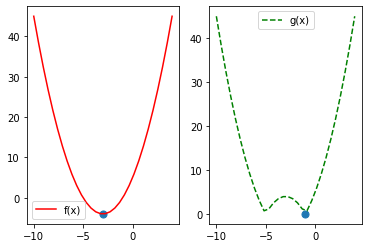

In [159]:
X = np.linspace(-10, 4, 30)

y_f = f(X, *ab)
y_g = g(X, *ab)

fig, ax = plt.subplots(1, 2)

ax[0].plot(X, y_f, "r", label="f(x)")
ax[1].plot(X, y_g, "g--", label="g(x)")
ax[0].legend()
ax[1].legend()

ax[0].scatter(x_f_min, y_f_min, s=50)
ax[1].scatter(x_g_min, y_g_min, s=50)

plt.show()

# Задание 5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой сторой (орлом или решкой)? 
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой сторой (орлом или решкой)? 
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой сторой (орлом или решкой)?

In [172]:
# we can use poission here because the number of experiments is high and probability is low
def poisson(prob: float, n: int, m: int) -> float:
    lam = prob * n
    return np.power(lam, m) / (math.factorial(m) * np.exp(lam))

In [173]:
coin_prob = 1/2

row_ten = np.power(coin_prob, 9)
not_row_ten = 1 - row_ten

row_eight = np.power(coin_prob, 7)
not_row_eight = 1 - row_eight

# at least 1 from 1000
at_least_one_row_ten = 1 - poisson(row_ten, 1000, 0)
at_least_one_row_eight = 1 - poisson(row_eight, 1000, 0)

print("1. ", at_least_one_row_ten)

print("2. ",at_least_one_row_eight)

# another way of counting

at_least_one_row_ten = 1 - np.power(not_row_ten, 1000)
at_least_one_row_eight = 1 - np.power(not_row_eight, 1000)

print("-- ",at_least_one_row_ten, at_least_one_row_eight)

# 3 from 1000

three_row_ten =  poisson(row_ten, 1000, 3)
print("3. ",three_row_ten)


0.8581698409126575 0.9995953548306737
0.858440454732242 0.9996075798421896
0.1761195052257957
